<a href="https://colab.research.google.com/github/kevinrsun05/PremierLeagueSoccer-Decision-Tree-Project/blob/main/Soccer_DTree_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the following packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')
teams = pd.read_csv('epl2020Final.csv')
print(teams.shape)
print(teams.head())

(576, 29)
   id  deep  deep_allowed  deepNet result   ppda_cal  allowed_ppda    ppdaNet  \
0   1    11             5        6      w   5.942857     21.454545 -15.511688   
1   2     5            11       -6      l  21.454545      5.942857  15.511688   
2   3     9             1        8      w   6.935484     16.400000  -9.464516   
3   4     1             9       -8      l  16.400000      6.935484   9.464516   
4   5     4             6       -2      d  13.600000      9.133333   4.466667   

   HS.x  HST.x  ...  AR.x  ShotNet  STNet  FNet  CNet  YNet  RNet  HtrgPerc  \
0    15      7  ...     0        3      2     0     9    -2     0  0.466667   
1    15      7  ...     0        3      2     0     9    -2     0  0.466667   
2     5      3  ...     0       -9     -6    -7     0     0     0  0.600000   
3     5      3  ...     0       -9     -6    -7     0     0     0  0.600000   
4    13      3  ...     0        5      0    -9    -1     1     0  0.230769   

   AtrgPerc   PercNet  
0  0

In [ ]:
# Divide data into predictor features vector and the label of the trget variable 'Risk
teams = pd.read_csv('epl2020Final.csv')
# 'Group','M/F',
#Dropping unwanted columns
teams = teams.drop(['id', 'deep', 'deep_allowed', 'ppda_cal', 'allowed_ppda', 'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x', 'AF.x', 'AC.x', 'AY.x', 'AR.x', 'HtrgPerc', 'AtrgPerc'],axis=1)
#Dropping specific patients with Converted as their Group variable
##teams = teams[teams.Group != 'Converted']
#Displaying current dataset after changes
teams.head()
#Changing Males and Females to numeric values
y = teams['result']
mapping_result = {'w': float(1), 'l': float(0), 'd': float(0.5)}
#Changing Demented and Nondemented patients to numeric values
##mapping_Group = {'Nondemented':0, 'Demented':1}
#Changing non numeric value variables to numbers
teams = teams.replace({'result': mapping_result})
#Drop all rows with missing values
teams = teams.dropna()
from sklearn import preprocessing
#Normalizing all the data within the Age Column
deepNet = teams[['deepNet']].values
min_max_scaler = preprocessing.MinMaxScaler()
deepNet_scaled = min_max_scaler.fit_transform(deepNet)
teams['deepNet'] = pd.DataFrame(deepNet_scaled)

#Normalizing all the data within the Years of Education Column
ppdaNet = teams[['ppdaNet']].values
ppdaNet_scaled = min_max_scaler.fit_transform(ppdaNet)
teams['ppdaNet'] = pd.DataFrame(ppdaNet_scaled)

ShotNet = teams[['ShotNet']].values
ShotNet_scaled = min_max_scaler.fit_transform(ShotNet)
teams['ShotNet'] = pd.DataFrame(ShotNet_scaled)

STNet = teams[['STNet']].values
STNet_scaled = min_max_scaler.fit_transform(STNet)
teams['STNet'] = pd.DataFrame(STNet_scaled)

FNet = teams[['FNet']].values
FNet_scaled = min_max_scaler.fit_transform(FNet)
teams['FNet'] = pd.DataFrame(FNet_scaled)

CNet = teams[['CNet']].values
CNet_scaled = min_max_scaler.fit_transform(CNet)
teams['CNet'] = pd.DataFrame(CNet_scaled)

YNet = teams[['YNet']].values
YNet_scaled = min_max_scaler.fit_transform(YNet)
teams['YNet'] = pd.DataFrame(YNet_scaled)

RNet = teams[['RNet']].values
RNet_scaled = min_max_scaler.fit_transform(RNet)
teams['RNet'] = pd.DataFrame(RNet_scaled)

PercNet = teams[['PercNet']].values
PercNet_scaled = min_max_scaler.fit_transform(PercNet)
teams['PercNet'] = pd.DataFrame(PercNet_scaled)

X = pd.DataFrame(teams)

X = teams.drop(['result'],axis=1)
#print(X)
#print(y)
# Dividing data into two subsets :train and test set.Training set trains the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y)
# Data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(teams.shape)
print(teams.head())
print(teams.info())

(576, 10)
    deepNet  result   ppdaNet   ShotNet     STNet      FNet      CNet  \
0  0.603448     1.0  0.352795  0.489362  0.636364  0.551724  0.733333   
1  0.396552     0.0  0.647205  0.489362  0.636364  0.551724  0.733333   
2  0.637931     1.0  0.410183  0.234043  0.272727  0.310345  0.433333   
3  0.362069     0.0  0.589817  0.234043  0.272727  0.310345  0.433333   
4  0.465517     0.5  0.542388  0.531915  0.545455  0.241379  0.400000   

       YNet  RNet   PercNet  
0  0.222222   0.5  0.571390  
1  0.222222   0.5  0.571390  
2  0.444444   0.5  0.512184  
3  0.444444   0.5  0.512184  
4  0.555556   0.5  0.447548  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   deepNet  576 non-null    float64
 1   result   576 non-null    float64
 2   ppdaNet  576 non-null    float64
 3   ShotNet  576 non-null    float64
 4   STNet    576 non-null    float64


Accuracy on training set: 1.000
Accuracy on test set: 0.388


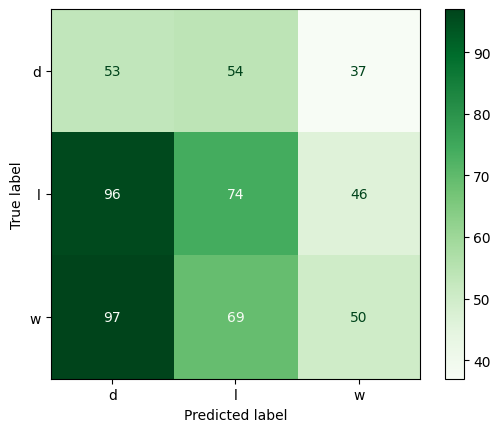

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifie
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
clf = DecisionTreeClassifier(random_state=100)
# Fiting the training data to the model
clf.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
m = KNeighborsClassifier()
m = m.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(estimator=m,X=X,y=y,cmap=plt.cm.Greens)

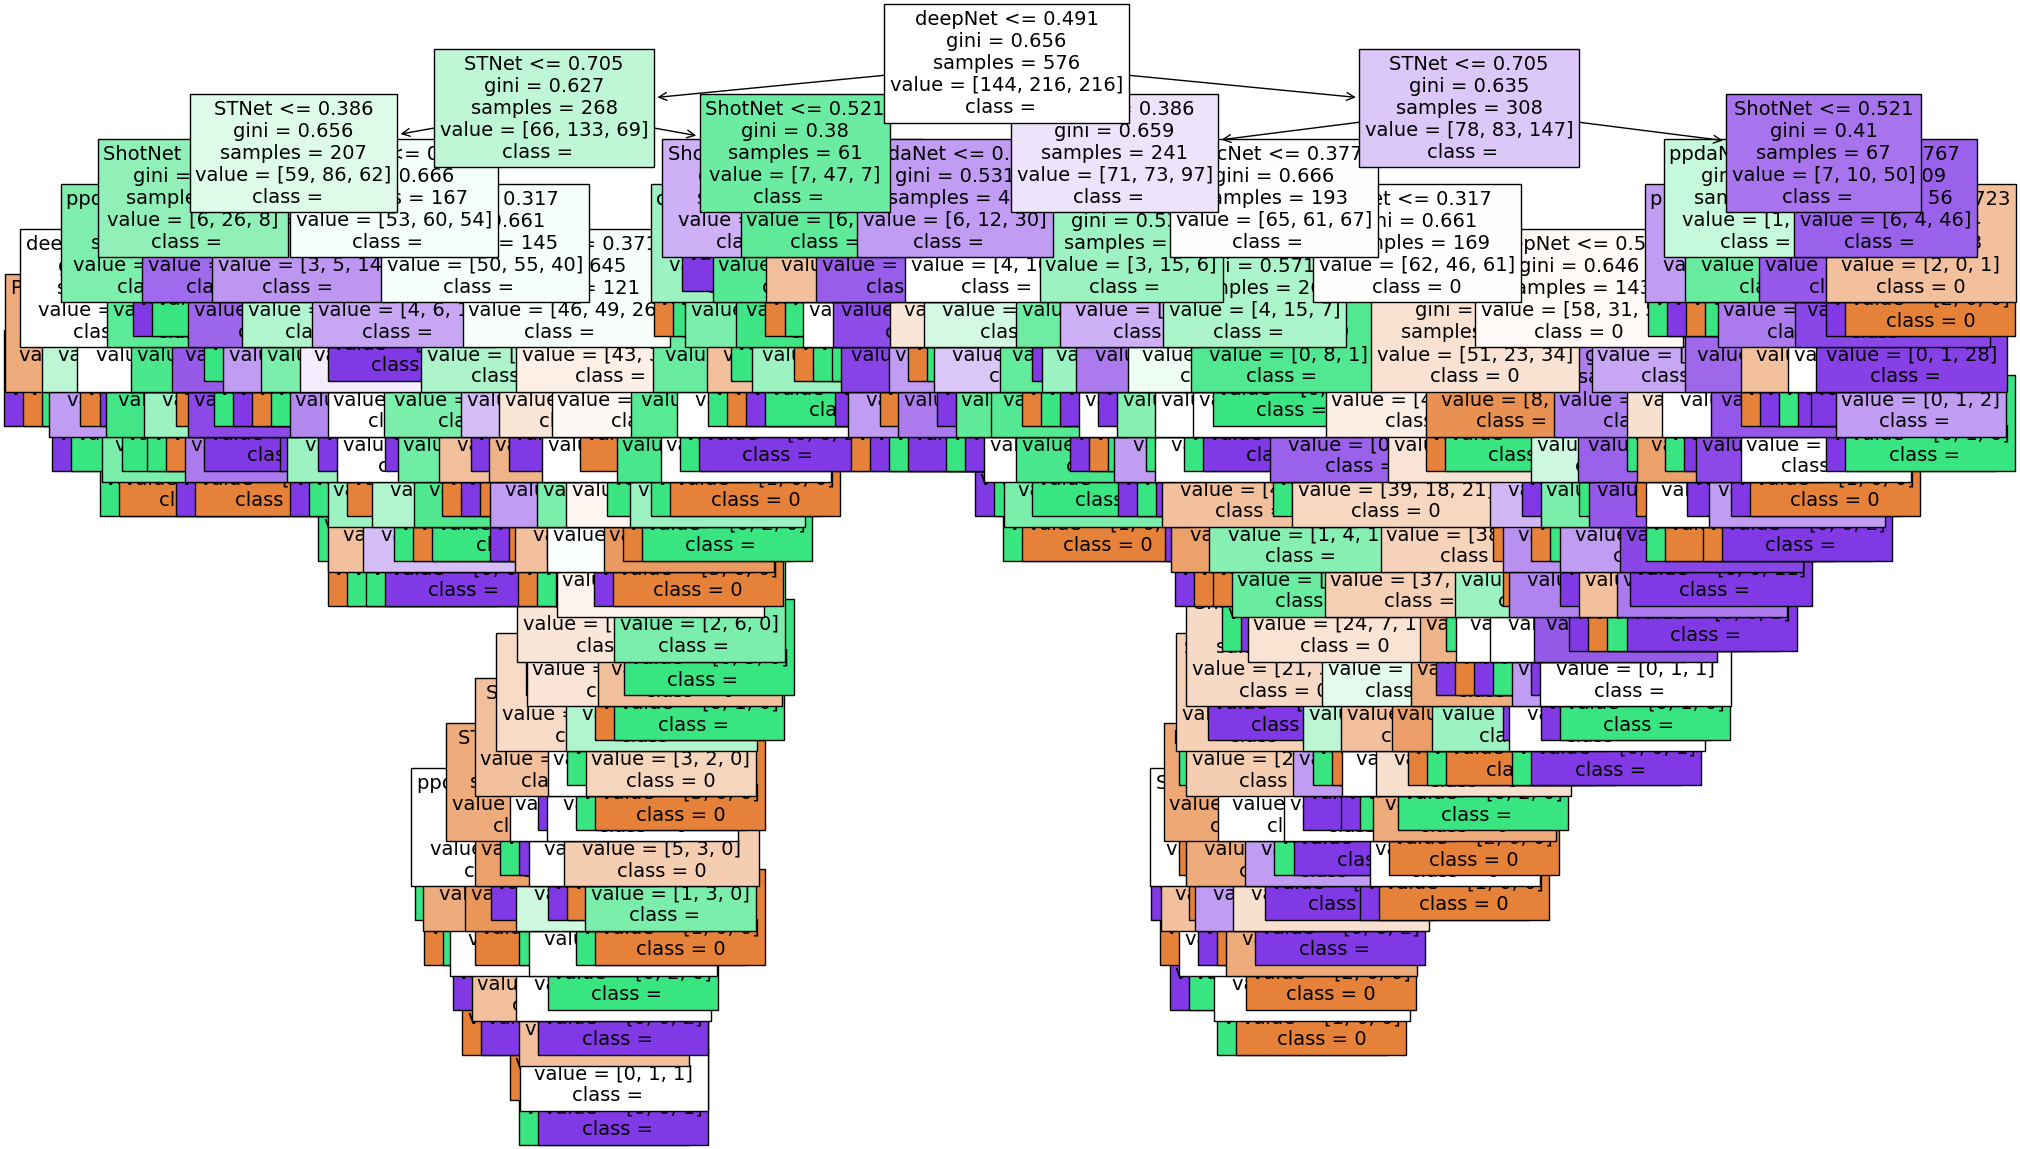

In [ ]:
from sklearn import tree
features = ['deepNet', 'ppdaNet','ShotNet','STNet','FNet','CNet','YNet', 'RNet', 'PercNet']
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X, y)
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14, feature_names = features,class_names = str(y))
fig.savefig("C:\\check\\decistion_tree.png")

Accuracy on training set: 0.476
Accuracy on test set: 0.526

Accuracy on training set: 0.476
Accuracy on test set: 0.526

Accuracy on training set: 0.517
Accuracy on test set: 0.491

Accuracy on training set: 0.539
Accuracy on test set: 0.552

Accuracy on training set: 0.607
Accuracy on test set: 0.517

Accuracy on training set: 0.652
Accuracy on test set: 0.526

Accuracy on training set: 0.713
Accuracy on test set: 0.500

Accuracy on training set: 0.746
Accuracy on test set: 0.491

Accuracy on training set: 0.820
Accuracy on test set: 0.509



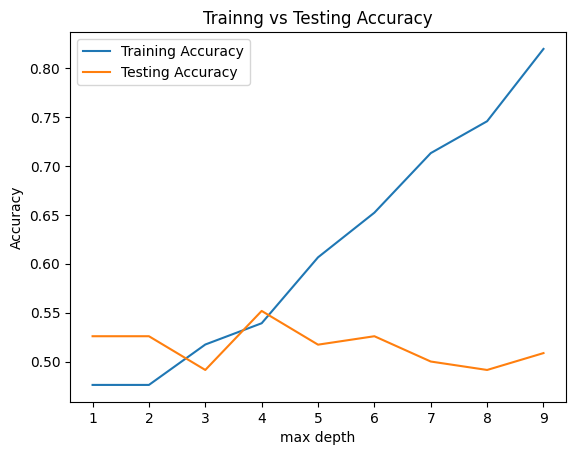

In [ ]:
import matplotlib.pyplot as plt
#Messing with max depth
x = []
train = []
test = []
for max_d in range(1,10):
  clf = DecisionTreeClassifier(max_depth=max_d, random_state=100)
  # Fiting the training data to the model
  clf.fit(X_train, y_train)
  # Printing the training accuracy with 3 significant figure accuracy
  print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
  # Printing the testing accuracy with 3 significant figure accuracy
  print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
  print('')
  train.append(clf.score(X_train, y_train))
  test.append(clf.score(X_test, y_test))
  x.append(max_d)
plt.plot(x, train, label = "Training Accuracy")
plt.plot(x, test, label = "Testing Accuracy")
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('Trainng vs Testing Accuracy')
plt.legend()
plt.show()

Accuracy on training set: 0.539
Accuracy on test set: 0.552



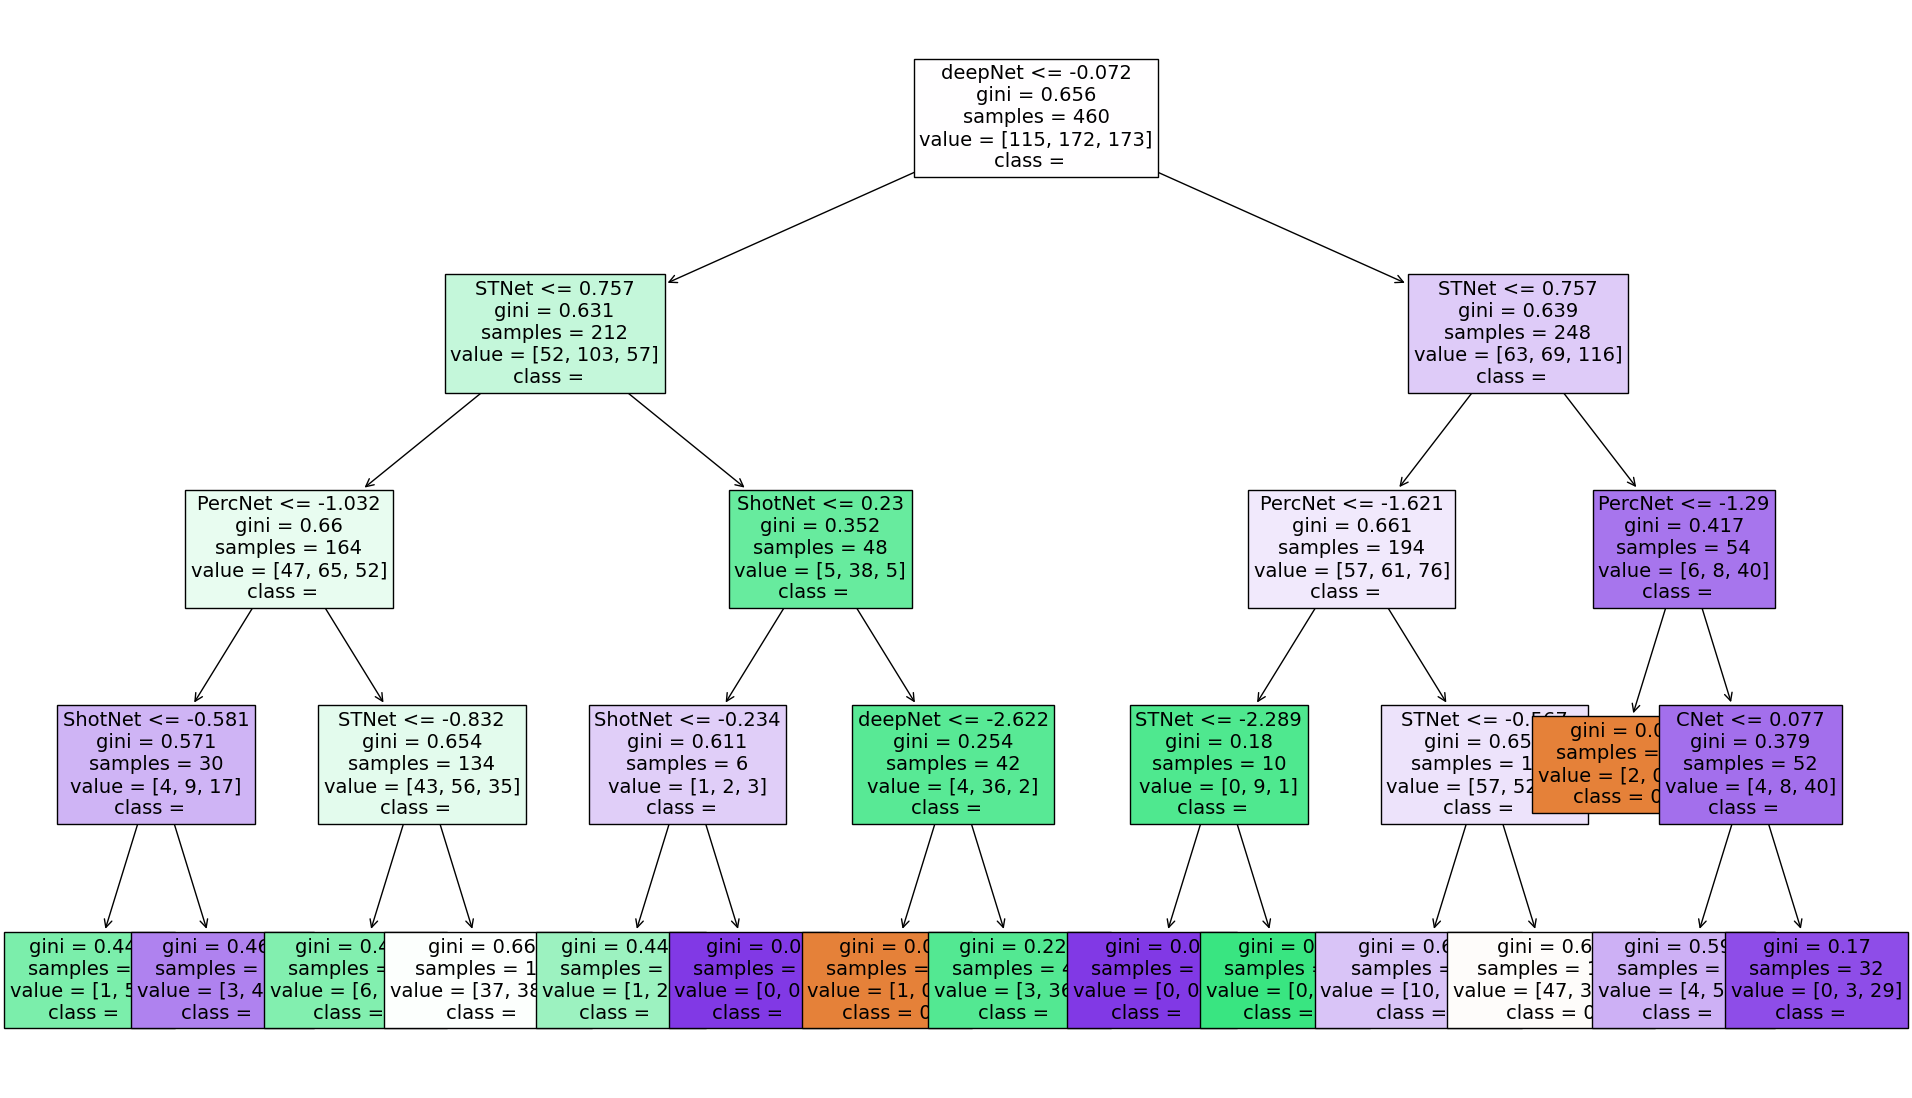

In [ ]:
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(max_depth=4, random_state=100)
# Fiting the training data to the model
clf.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
print('')
%matplotlib inline
fig = plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14, feature_names = features,class_names = str(y))
fig.savefig("C:\\check\\decistion_tree.png")

Accuracy on training set: 0.476
Accuracy on test set: 0.526

Accuracy on training set: 0.476
Accuracy on test set: 0.526

Accuracy on training set: 0.476
Accuracy on test set: 0.526

Accuracy on training set: 0.493
Accuracy on test set: 0.500

Accuracy on training set: 0.511
Accuracy on test set: 0.491

Accuracy on training set: 0.511
Accuracy on test set: 0.491

Accuracy on training set: 0.528
Accuracy on test set: 0.491

Accuracy on training set: 0.537
Accuracy on test set: 0.500

Accuracy on training set: 0.543
Accuracy on test set: 0.491

Accuracy on training set: 0.548
Accuracy on test set: 0.483

Accuracy on training set: 0.552
Accuracy on test set: 0.517

Accuracy on training set: 0.567
Accuracy on test set: 0.517

Accuracy on training set: 0.583
Accuracy on test set: 0.509

Accuracy on training set: 0.591
Accuracy on test set: 0.517

Accuracy on training set: 0.598
Accuracy on test set: 0.509

Accuracy on training set: 0.602
Accuracy on test set: 0.509

Accuracy on training set

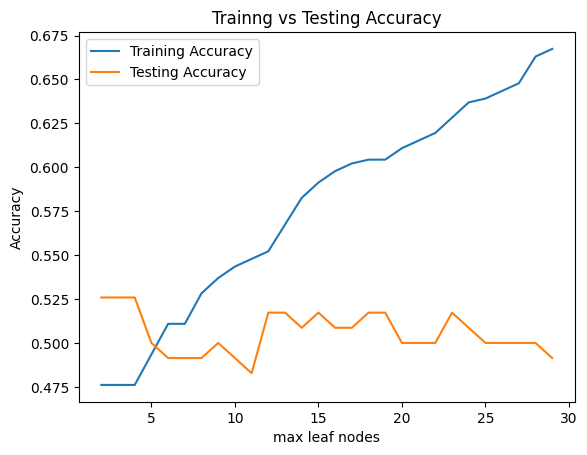

In [ ]:
#Max Leaf Node
x = []
train = []
test = []
for max_d in range(2,30):
  clf = DecisionTreeClassifier(max_leaf_nodes=max_d, random_state=100)
  # Fiting the training data to the model
  clf.fit(X_train, y_train)
  # Printing the training accuracy with 3 significant figure accuracy
  print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
  # Printing the testing accuracy with 3 significant figure accuracy
  print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
  print('')
  train.append(clf.score(X_train, y_train))
  test.append(clf.score(X_test, y_test))
  x.append(max_d)
plt.plot(x, train, label = "Training Accuracy")
plt.plot(x, test, label = "Testing Accuracy")
plt.xlabel('max leaf nodes')
plt.ylabel('Accuracy')
plt.title('Trainng vs Testing Accuracy')
plt.legend()
plt.show()

Accuracy on training set: 0.539
Accuracy on test set: 0.552



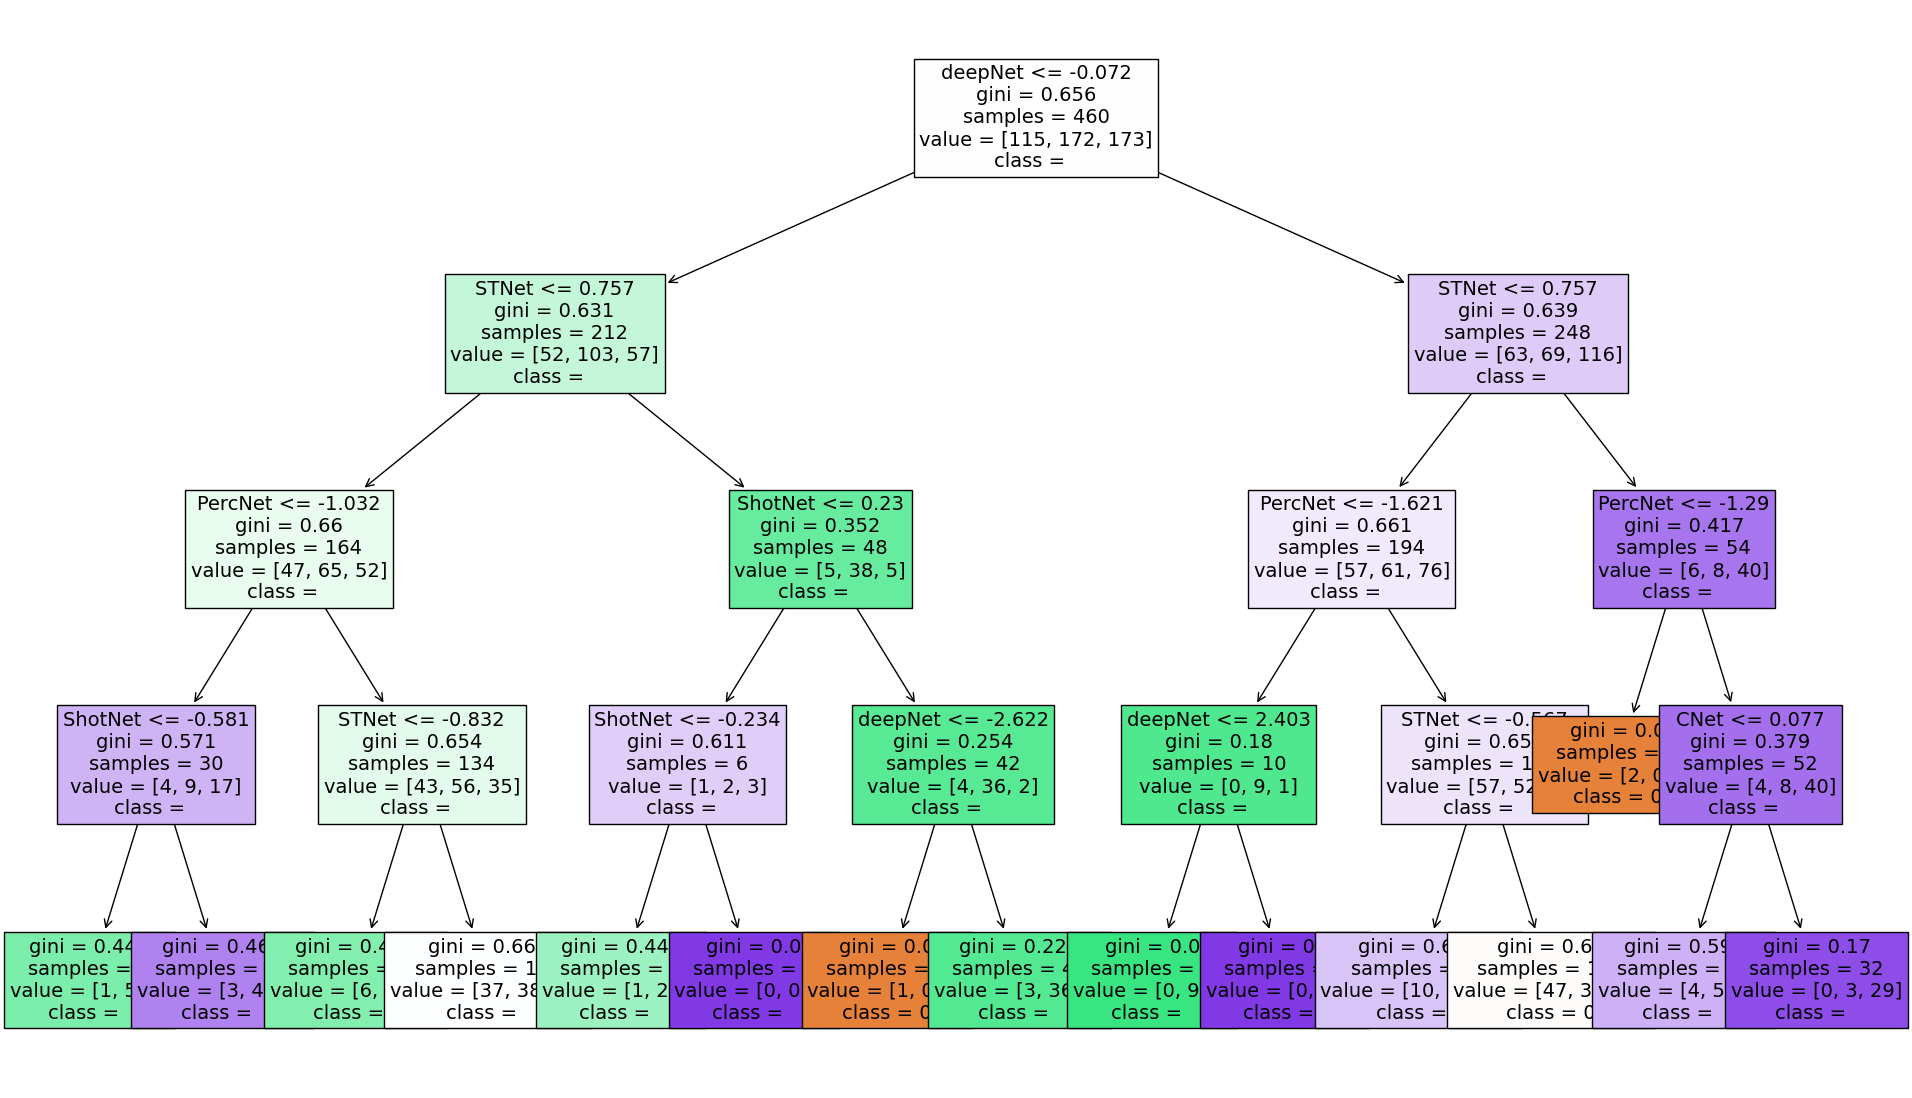

In [ ]:
#https://www.section.io/engineering-education/hyperparmeter-tuning/
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(min_samples_split = 2, max_leaf_nodes = 15, max_depth = 4)
# Fiting the training data to the model
clf.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
print('')
%matplotlib inline
fig = plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14, feature_names = features,class_names = str(y))
fig.savefig("C:\\check\\decistion_tree.png")

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 100, n_jobs = -1)
clf.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
print('')

Accuracy on training set: 1.000
Accuracy on test set: 0.509



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 100, n_jobs = -1, n_estimators= 1)
clf.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
print('')

Accuracy on training set: 0.759
Accuracy on test set: 0.422



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 100, n_jobs = -1, max_features = 'log2')
clf.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
print('')

Accuracy on training set: 1.000
Accuracy on test set: 0.509



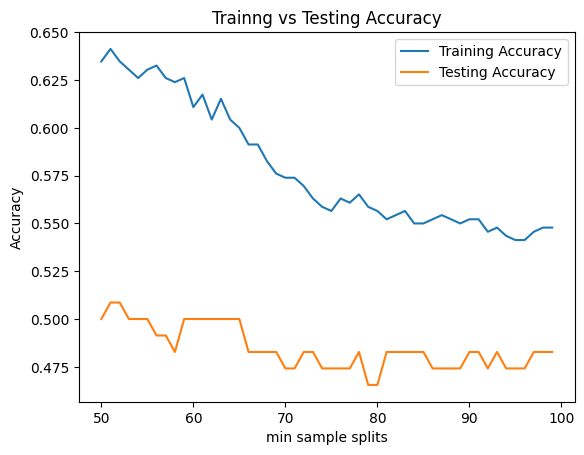

In [ ]:
from sklearn.ensemble import RandomForestClassifier
train =[]
test = []
x = []
for max_d in range(50,100):
  clf = RandomForestClassifier(random_state=100, n_jobs = -1, min_samples_split = max_d)
  # Fiting the training data to the model
  clf.fit(X_train, y_train)
  # Printing the training accuracy with 3 significant figure accuracy
  #print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
  # Printing the testing accuracy with 3 significant figure accuracy
  #print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
  #print('')
  train.append(clf.score(X_train, y_train))
  test.append(clf.score(X_test, y_test))
  x.append(max_d)
plt.plot(x, train, label = "Training Accuracy")
plt.plot(x, test, label = "Testing Accuracy")
plt.xlabel('min sample splits')
plt.ylabel('Accuracy')
plt.title('Trainng vs Testing Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {"max_depth": [1, 20],
    "max_leaf_nodes": [1,20],
     "min_samples_split" : [2,10]
     }
clf = DecisionTreeClassifier()
random_search = RandomizedSearchCV(clf, param_dist, cv=5)
random_search.fit(X_train, y_train)
print(random_search.best_params_)



{'min_samples_split': 2, 'max_leaf_nodes': 20, 'max_depth': 1}
